## ECE 239 Final Project

In this project we explore various deep learning algorithms on the EEG dataset. 


In [1]:
# Imports and setup

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM
from keras.layers import GRU
import matplotlib.pyplot as plt

from utils.load_data import *
from utils.utilities import *
from models.cnn import CNN
from models.rnn import RNN
from models.autoencoder import Autoencoder


%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
# Loads data from the EEG dataset and removes all EOG data

person_train_val, X_train_val, y_train_val, person_test, X_test, y_test = load_EEG_data()

print ('Training/Valid data shape: {}'.format(X_train_val.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_val.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_val.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


### Split into train and validation datasets

In [3]:
X_train, y_train, X_val, y_val = split_train_val(X_train_val, y_train_val, percent_validation=0.1)

print ('Training data shape: {}'.format(X_train.shape))
print ('Training target shape: {}'.format(y_train.shape))
print ('Validation data shape: {}'.format(X_val.shape))
print ('Validation target shape: {}'.format(y_val.shape))

Training data shape: (1904, 22, 1000)
Training target shape: (1904,)
Validation data shape: (211, 22, 1000)
Validation target shape: (211,)


## One hot encoding for all labels

In [4]:
print (y_val[33])
print (y_val.shape)
print (y_test.shape)

y_train_labels = one_hot_encode(y_train)
y_val_labels = one_hot_encode(y_val)
y_test_labels = one_hot_encode(y_test)

print (y_val_labels[33])
print (y_val_labels.shape)
print (y_test_labels.shape)


771
(211,)
(443,)
[0. 0. 1. 0.]
(211, 4)
(443, 4)


## Viewing the data for different classes

as you can see, there is not much of a difference

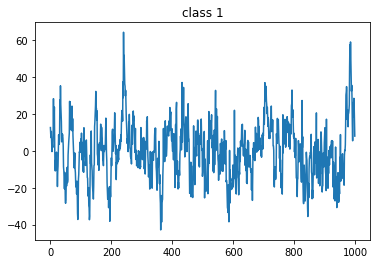

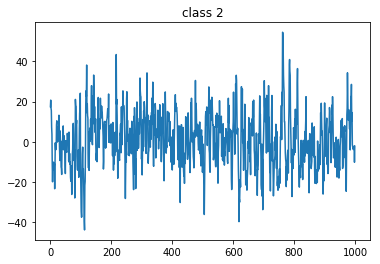

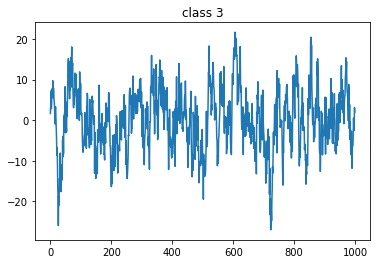

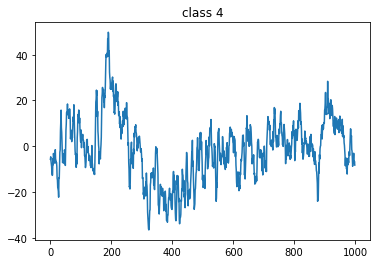

In [9]:
class1 = np.argmax( y_train == 769)
class2 = np.argmax( y_train == 770)
class3 = np.argmax( y_train == 771)
class4 = np.argmax( y_train == 772)
EEG0_class1 = X_train[class1,0,:]
EEG0_class2 = X_train[class2,0,:]
EEG0_class3 = X_train[class3,0,:]
EEG0_class4 = X_train[class4,0,:]

plt.plot(range(1000), EEG0_class1)
plt.title("class 1")
plt.show()

plt.plot(range(1000), EEG0_class2)
plt.title("class 2")
plt.show()

plt.plot(range(1000), EEG0_class3)
plt.title("class 3")
plt.show()

plt.plot(range(1000), EEG0_class4)
plt.title("class 4")
plt.show()

## Classifying data using a CNN

In [14]:


starts = [0, 100, 200, 300, 400, 500]
ends = [500, 600, 700, 800, 900, 1000]
downsamples = [5, 10]
bestcnn = None
bestacc = 0
bestparams = []
params_accuracies = []

for i in range(len(starts)):
    start = starts[i]
    end = ends[i]
    for downsample in downsamples:
        params = [start, end, downsample]
        print ("Training with params = " + str(params))
        cnn = CNN(X_train, y_train_labels, X_val, y_val_labels, X_test, y_test_labels,
                  start=start,end=end,downsample=downsample)
        cnn.train(stride=2, optimizer='adam', epochs=8, dropout=0.4)
        val_loss, val_accuracy = cnn.evaluate_validation()
        params_accuracies.append([params, val_accuracy])
        if (val_accuracy > bestacc):
            bestcnn = cnn
            bestacc = val_accuracy
            bestparams = params
            
print("Best val, params are: ")
print(bestacc)
print(bestparams)
#cnn.show_model()
test_loss, test_accuracy = cnn.evaluate()
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

print("All params and accuracies: ")
print(params_accuracies)

Training with params = [0, 500, 5]
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 1904 samples, validate on 211 samples
Epoch 1/8
1904/1904 [==============================] - 1s 659us/sample - loss: 1.5628 - acc: 0.2558 - val_loss: 1.4205 - val_acc: 0.2275
Epoch 2/8
1904/1904 [==============================] - 1s 326us/sample - loss: 1.3305 - acc: 0.3608 - val_loss: 1.4747 - val_acc: 0.2512
Epoch 3/8
1904/1904 [==============================] - 1s 324us/sample - loss: 1.2637 - acc: 0.4233 - val_loss: 1.5121 - val_acc: 0.2607
Epoch 4/8
1904/1904 [==============================] - 1s 334us/sample - loss: 1.1809 - acc: 0.4753 - val_loss: 1.5700 - val_acc: 0.2844
Epoch 5/8
1904/1904 [==============================] - 1s 326us/sample - loss: 1.0325 - acc: 0.5452 - val_loss: 1.5924 - val_acc: 0.2844
Epoch 6/8
1904/1904 [==============================] - 1s 349us/sample - loss: 0.8940 - acc: 0.6271 - val_loss: 1.9926

Epoch 6/8
1904/1904 [==============================] - 1s 342us/sample - loss: 1.0368 - acc: 0.5578 - val_loss: 1.7174 - val_acc: 0.2844
Epoch 7/8
1904/1904 [==============================] - 1s 497us/sample - loss: 0.8845 - acc: 0.6271 - val_loss: 1.9522 - val_acc: 0.2796
Epoch 8/8
1904/1904 [==============================] - 1s 348us/sample - loss: 0.7776 - acc: 0.6812 - val_loss: 2.0621 - val_acc: 0.2559
Training with params = [300, 800, 10]
Train on 1904 samples, validate on 211 samples
Epoch 1/8
1904/1904 [==============================] - 1s 757us/sample - loss: 1.4965 - acc: 0.2584 - val_loss: 1.3987 - val_acc: 0.2749
Epoch 2/8
1904/1904 [==============================] - 1s 285us/sample - loss: 1.3767 - acc: 0.3167 - val_loss: 1.3833 - val_acc: 0.2938
Epoch 3/8
1904/1904 [==============================] - 1s 285us/sample - loss: 1.3337 - acc: 0.3661 - val_loss: 1.4508 - val_acc: 0.2844
Epoch 4/8
1904/1904 [==============================] - 1s 337us/sample - loss: 1.2707 - acc: 

## Classifying data using an LSTM Architecture

In [52]:
starts = [0, 100, 200, 300, 400, 500]
ends = [500, 600, 700, 800, 900, 1000]
downsamples = [5, 10]
bestrnn = None
bestacc = 0
bestparams = []
params_accuracies = []

for i in range(len(starts)):
    start = starts[i]
    end = ends[i]
    for downsample in downsamples:
        params = [start, end, downsample]
        print ("Training with params = " + str(params))
        rnn = RNN(X_train, y_train_labels, X_val, y_val_labels, 
                  X_test, y_test_labels,
                  start=start, end=end, downsample=downsample)
        rnn.train(RNN_architecture=LSTM, activation="softmax", \
                      optimizer='adam', epochs=5, batch_size=100, dropout=0.3, units=400)
        val_loss, val_accuracy = rnn.evaluate_validation()
        params_accuracies.append([params, val_accuracy])
        if (val_accuracy > bestacc):
            bestrnn = rnn
            bestacc = val_accuracy
            bestparams = params
            
print("Best val, params are: ")
print(bestacc)
print(bestparams)

test_loss, test_accuracy = bestrnn.evaluate()

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

print("All params and accuracies: ")
print(params_accuracies)


Training with params = [0, 500, 5]
Train on 1904 samples, validate on 211 samples
Epoch 1/5
1904/1904 [==============================] - 24s 13ms/step - loss: 1.5329 - acc: 0.2553 - val_loss: 1.4518 - val_acc: 0.2512
Epoch 2/5
1904/1904 [==============================] - 14s 8ms/step - loss: 1.4142 - acc: 0.3009 - val_loss: 1.4034 - val_acc: 0.2796
Epoch 3/5
1904/1904 [==============================] - 15s 8ms/step - loss: 1.3728 - acc: 0.3183 - val_loss: 1.4025 - val_acc: 0.3365
Epoch 4/5
1904/1904 [==============================] - 15s 8ms/step - loss: 1.3423 - acc: 0.3629 - val_loss: 1.4341 - val_acc: 0.2796
Epoch 5/5
1904/1904 [==============================] - 15s 8ms/step - loss: 1.3307 - acc: 0.3671 - val_loss: 1.3846 - val_acc: 0.3128
Training with params = [0, 500, 10]
Train on 1904 samples, validate on 211 samples
Epoch 1/5


KeyboardInterrupt: 

In [8]:
#best was 0, 500, 10. train with these parameters
rnn = RNN(X_train, y_train_labels, X_val, y_val_labels, 
                  X_test, y_test_labels,
                  start=0, end=200, downsample=10)
rnn.train(RNN_architecture=LSTM, activation="softmax", \
              optimizer='adam', epochs=15, batch_size=100, dropout=0.5, units=500)
val_loss, val_accuracy = rnn.evaluate_validation()

    #best val acc ~= 0.45

Train on 1904 samples, validate on 211 samples
Epoch 1/15
1904/1904 [==============================] - 7s 4ms/step - loss: 1.5994 - acc: 0.2931 - val_loss: 1.3783 - val_acc: 0.3175
Epoch 2/15
1904/1904 [==============================] - 4s 2ms/step - loss: 1.4319 - acc: 0.3461 - val_loss: 1.4325 - val_acc: 0.3033
Epoch 3/15
1904/1904 [==============================] - 4s 2ms/step - loss: 1.3991 - acc: 0.3566 - val_loss: 1.3832 - val_acc: 0.3412
Epoch 4/15
1904/1904 [==============================] - 4s 2ms/step - loss: 1.3418 - acc: 0.3902 - val_loss: 1.3896 - val_acc: 0.3649
Epoch 5/15
1904/1904 [==============================] - 4s 2ms/step - loss: 1.3425 - acc: 0.4123 - val_loss: 1.3837 - val_acc: 0.3649
Epoch 6/15
1904/1904 [==============================] - 4s 2ms/step - loss: 1.2915 - acc: 0.4338 - val_loss: 1.3558 - val_acc: 0.3460
Epoch 7/15
1904/1904 [==============================] - 4s 2ms/step - loss: 1.2551 - acc: 0.4364 - val_loss: 1.4506 - val_acc: 0.3412
Epoch 8/15
1904

## Classifying Data using a GRU Architecture

In [7]:
starts = [0, 100, 200, 300, 400, 500]
ends = [500, 600, 700, 800, 900, 1000]
downsamples = [5, 10]
bestrnn = None
bestacc = 0
bestparams = []
params_accuracies = []

for i in range(len(starts)):
    start = starts[i]
    end = ends[i]
    for downsample in downsamples:
        params = [start, end, downsample]
        print ("Training with params = " + str(params))
        rnn = RNN(X_train, y_train_labels, X_val, y_val_labels, 
                  X_test, y_test_labels,
                  start=start, end=end, downsample=downsample)
        rnn.train(RNN_architecture=GRU, activation="softmax", \
                      optimizer='adam', epochs=5, batch_size=100, dropout=0.3, units=400)
        val_loss, val_accuracy = rnn.evaluate_validation()
        params_accuracies.append([params, val_accuracy])
        if (val_accuracy > bestacc):
            bestrnn = rnn
            bestacc = val_accuracy
            bestparams = params
            
print("Best val, params are: ")
print(bestacc)
print(bestparams)

test_loss, test_accuracy = bestrnn.evaluate()

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

print("All params and accuracies: ")
print(params_accuracies)



Training with params = [200, 700, 5]
Train on 1904 samples, validate on 211 samples
Epoch 1/5
1904/1904 [==============================] - 12s 6ms/step - loss: 1.6404 - acc: 0.2500 - val_loss: 1.4570 - val_acc: 0.2844
Epoch 2/5
1904/1904 [==============================] - 11s 6ms/step - loss: 1.5254 - acc: 0.3141 - val_loss: 1.4861 - val_acc: 0.2986
Epoch 3/5
1904/1904 [==============================] - 12s 6ms/step - loss: 1.5181 - acc: 0.3241 - val_loss: 1.4978 - val_acc: 0.3033
Epoch 4/5
1904/1904 [==============================] - 11s 6ms/step - loss: 1.4665 - acc: 0.3414 - val_loss: 1.4513 - val_acc: 0.2891
Epoch 5/5
1904/1904 [==============================] - 11s 6ms/step - loss: 1.4246 - acc: 0.3592 - val_loss: 1.5404 - val_acc: 0.2701
Training with params = [200, 700, 10]
Train on 1904 samples, validate on 211 samples
Epoch 1/5
1904/1904 [==============================] - 8s 4ms/step - loss: 1.6785 - acc: 0.2468 - val_loss: 1.4758 - val_acc: 0.2891
Epoch 2/5
1904/1904 [=======

## Autoencoder

In [15]:
normed_X_train = X_train/np.max(X_train)
normed_X_val = X_val/np.max(X_val)
normed_X_test = X_test/np.max(X_test)
normed_X_train = normed_X_train[:,:,0:500:10]
normed_X_val = normed_X_val[:,:,0:500:10]
normed_X_test = normed_X_test[:,:,0:500:10]
autoencoder = Autoencoder(normed_X_train, normed_X_val, normed_X_test)
autoencoder.train(epochs=10, encoded_dim=500)



Train on 1904 samples, validate on 211 samples
Epoch 1/10
1904/1904 [==============================] - 3s 2ms/sample - loss: 0.0062 - acc: 0.3528 - val_loss: 0.0024 - val_acc: 0.5401
Epoch 2/10
1904/1904 [==============================] - 2s 1ms/sample - loss: 0.0018 - acc: 0.6010 - val_loss: 0.0016 - val_acc: 0.6211
Epoch 3/10
1904/1904 [==============================] - 2s 1ms/sample - loss: 0.0012 - acc: 0.6575 - val_loss: 0.0012 - val_acc: 0.6650
Epoch 4/10
1904/1904 [==============================] - 2s 1ms/sample - loss: 0.0010 - acc: 0.6897 - val_loss: 0.0011 - val_acc: 0.6859
Epoch 5/10
1904/1904 [==============================] - 2s 1ms/sample - loss: 8.9927e-04 - acc: 0.7041 - val_loss: 9.5646e-04 - val_acc: 0.7083
Epoch 6/10
1904/1904 [==============================] - 2s 1ms/sample - loss: 8.0452e-04 - acc: 0.7172 - val_loss: 9.0153e-04 - val_acc: 0.6993
Epoch 7/10
1904/1904 [==============================] - 2s 1ms/sample - loss: 7.6475e-04 - acc: 0.7248 - val_loss: 8.8201

In [16]:
new_data = autoencoder.predict(normed_X_train)

abs_err = np.abs(normed_X_train - new_data)
print("Absolute Error in encoded data is roughly: " + str(np.mean(abs_err)))
print(normed_X_train[0,0,0:50])
print(new_data[0,0,0:50])


Absolute Error in encoded data is roughly: 0.021799898535768927
[ 0.05083089  0.03079179 -0.04252199 -0.06109482  0.05327468 -0.0259042
 -0.08748778 -0.12609971 -0.16715543  0.00097752 -0.1627566  -0.1402737
 -0.06109482 -0.0342131   0.04692082 -0.01808407 -0.09237537  0.07673509
  0.0083089   0.03128055  0.18181818  0.07722385  0.06549365  0.12805474
  0.13196481  0.11779081 -0.02737048 -0.04936461  0.08699902 -0.07135875
  0.04545455 -0.11925709 -0.01710655  0.1026393   0.04936461  0.08699902
 -0.13049853 -0.00097752  0.00928641  0.02297165 -0.1285435  -0.15591398
 -0.05327468 -0.16324536  0.15298143 -0.25659824 -0.04349951 -0.04349951
  0.01955034  0.13391984]
[ 0.08455054  0.01003184 -0.01369973 -0.09312438  0.06791154 -0.06001383
 -0.12130575 -0.169068   -0.19716367  0.0288324  -0.14226434 -0.126699
 -0.07040685 -0.07513002  0.0227511  -0.01875495 -0.08132087  0.07117506
 -0.01417374 -0.03143358  0.15789133  0.10410597  0.15438569  0.07352267
  0.09642446  0.11649604  0.02451176 -

## Plot of original data, and autoencoded data

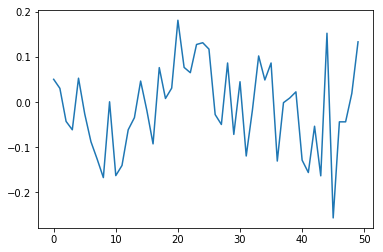

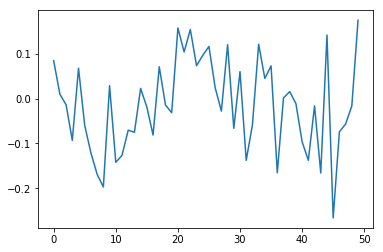

In [17]:
original = normed_X_train[0,0,:]
autoencoded = new_data[0,0,:]

plt.plot(range(len(original)), original)
plt.show()

plt.plot(range(len(autoencoded)), autoencoded)
plt.show()

## Training with autoencoder data

In [ ]:
X_train_total = np.concatenate((normed_X_train, new_data), axis=0)
y_train_total = np.concatenate((y_train_labels, y_train_labels), axis=0)

rnn = RNN(X_train_total, y_train_total, normed_X_val, y_val_labels, normed_X_test, y_test_labels, 
         start=0, end=12323, downsample=1)
rnn.train(RNN_architecture=LSTM, activation="softmax", \
              optimizer='adam', epochs=10, batch_size=100, dropout=0.3, units=500)
test_loss, test_accuracy = rnn.evaluate()
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


rnn.plot()

Train on 3808 samples, validate on 211 samples
Epoch 1/10
3808/3808 [==============================] - 23s 6ms/step - loss: 1.3688 - acc: 0.3086 - val_loss: 1.3324 - val_acc: 0.3175
Epoch 2/10
3808/3808 [==============================] - 22s 6ms/step - loss: 1.3119 - acc: 0.3795 - val_loss: 1.6098 - val_acc: 0.3649
Epoch 3/10
3808/3808 [==============================] - 22s 6ms/step - loss: 1.3188 - acc: 0.3797 - val_loss: 1.3327 - val_acc: 0.3602
Epoch 4/10
3808/3808 [==============================] - 23s 6ms/step - loss: 1.2780 - acc: 0.4141 - val_loss: 1.2875 - val_acc: 0.3744
Epoch 5/10
3808/3808 [==============================] - 23s 6ms/step - loss: 1.2511 - acc: 0.4265 - val_loss: 1.4515 - val_acc: 0.3318
Epoch 6/10
3808/3808 [==============================] - 24s 6ms/step - loss: 1.2641 - acc: 0.4220 - val_loss: 1.2888 - val_acc: 0.4123
Epoch 7/10
3808/3808 [==============================] - 22s 6ms/step - loss: 1.2454 - acc: 0.4378 - val_loss: 1.2839 - val_acc: 0.4028
Epoch 8/